Accuracy: 95.56%


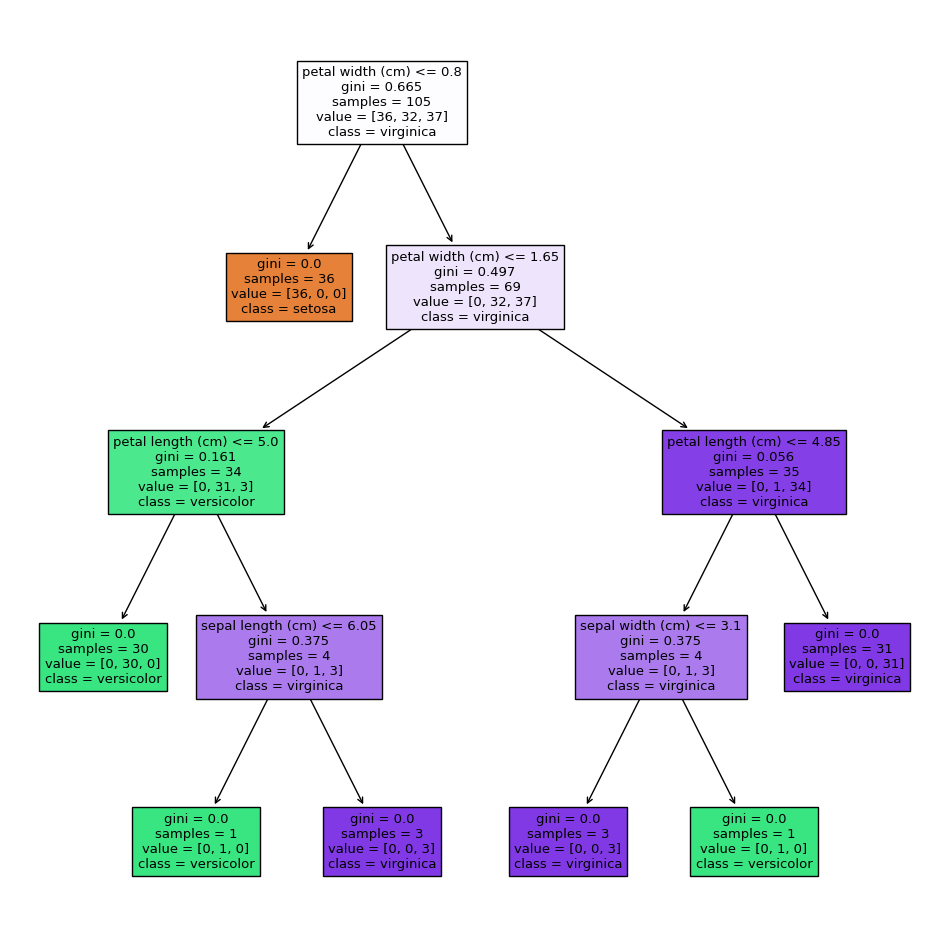

In [4]:
#TASK 1A i USING LIBRARIES
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

plt.figure(figsize=(12,12))
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


Error at epoch 0: 0.4993115461156098
Error at epoch 1000: 0.49923559684576224
Error at epoch 2000: 0.4900624695898629
Error at epoch 3000: 0.4317710151541003
Error at epoch 4000: 0.3820561780275187
Error at epoch 5000: 0.354168653833565
Error at epoch 6000: 0.3367423008561655
Error at epoch 7000: 0.32363789204537885
Error at epoch 8000: 0.31337297216725746
Error at epoch 9000: 0.30520986104061626


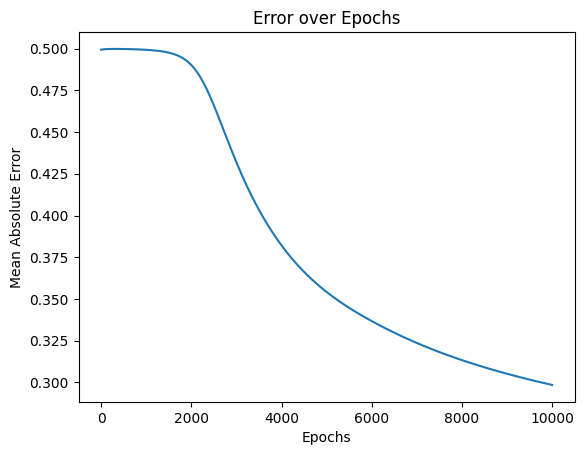

Output after training:
[[0.11601492]
 [0.74954116]
 [0.75229328]
 [0.57996028]]


In [5]:
#TASK 1A ii
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])

outputs = np.array([[0],
                    [1],
                    [1],
                    [0]])

np.random.seed(1)

weights_0 = 2 * np.random.random((2, 2)) - 1
weights_1 = 2 * np.random.random((2, 1)) - 1

learning_rate = 0.1
epochs = 10000

error_history = []

for epoch in range(epochs):
    layer_0 = inputs
    layer_1 = sigmoid(np.dot(layer_0, weights_0))
    layer_2 = sigmoid(np.dot(layer_1, weights_1))
    
    layer_2_error = outputs - layer_2
    
    error_history.append(np.mean(np.abs(layer_2_error)))
    
    if (epoch % 1000) == 0:
        print(f'Error at epoch {epoch}: {error_history[-1]}')
    
    layer_2_delta = layer_2_error * sigmoid_derivative(layer_2)
    layer_1_error = layer_2_delta.dot(weights_1.T)
    layer_1_delta = layer_1_error * sigmoid_derivative(layer_1)
    
    weights_1 += layer_1.T.dot(layer_2_delta) * learning_rate
    weights_0 += layer_0.T.dot(layer_1_delta) * learning_rate

plt.plot(error_history)
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Error over Epochs')
plt.show()

print('Output after training:')
print(layer_2)


In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', categories=['alt.atheism', 'sci.space'], shuffle=True, random_state=1)

# Convert the dataset into a DataFrame
df = pd.DataFrame({'text': newsgroups.data, 'label': newsgroups.target})

# Convert text data to feature vectors
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])

# Convert labels to binary values (for simplicity, let's consider 0 and 1)
y = df['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create a Naive Bayes classifier
clf = MultinomialNB()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')


Accuracy: 99.07%
Precision: 99.08%
Recall: 99.07%


Number of unique classes: 20
Number of training samples: 11314
Number of test samples: 7532
Accuracy: 0.7738980350504514
Precision: 0.8218781741893993
Recall: 0.7738980350504514


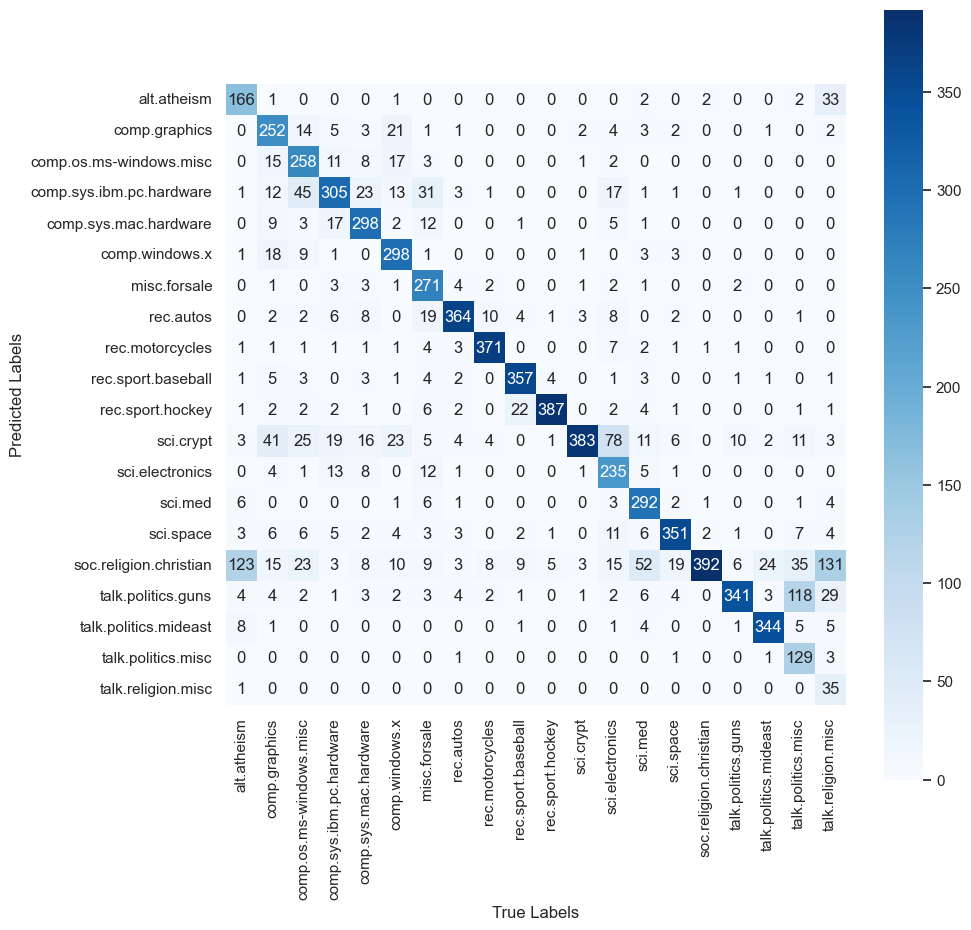

In [9]:
#another code naive bayes text classification
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Set seaborn plotting style
sns.set()

# Load the dataset
data = fetch_20newsgroups()

# Get the text categories
text_categories = data.target_names

# Define the training and test sets
train_data = fetch_20newsgroups(subset="train", categories=text_categories)
test_data = fetch_20newsgroups(subset="test", categories=text_categories)

print("Number of unique classes:", len(text_categories))
print("Number of training samples:", len(train_data.data))
print("Number of test samples:", len(test_data.data))

# Model building
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train_data.data, train_data.target)

# Predict categories
predicted_categories = model.predict(test_data.data)

# Compute metrics: accuracy, precision, and recall
accuracy = accuracy_score(test_data.target, predicted_categories)
precision = precision_score(test_data.target, predicted_categories, average='weighted')
recall = recall_score(test_data.target, predicted_categories, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Plotting the confusion matrix
mat = confusion_matrix(test_data.target, predicted_categories)
plt.figure(figsize=(10, 10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_data.target_names, yticklabels=train_data.target_names)
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.show()
